In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
b_dat_14 = pd.read_csv('/Users/sidneylower/Downloads/1014_b_subset.csv')
b_dat_28 = pd.read_csv('/Users/sidneylower/Downloads/1028_v_subset.csv')

In [41]:
time_b_14 = b_dat_14['J.D.-2400000']
time_b_28 = b_dat_28['J.D.-2400000']

mag_b_14 = b_dat_14['delta mag']
mag_b_28 = b_dat_28['delta mag']

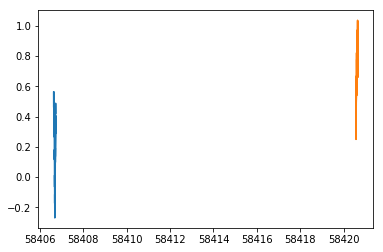

In [42]:
plt.plot(time_b_14, mag_b_14)
plt.plot(time_b_28, mag_b_28)

In [43]:
lightcurve = np.empty((len(mag_b_14)+len(mag_b_28), 2))

In [48]:
lightcurve[0:len(mag_b_14), 0] = time_b_14
lightcurve[len(mag_b_14):, 0] = time_b_28

lightcurve[0:len(mag_b_14), 1] = mag_b_14
lightcurve[len(mag_b_14):, 1] = mag_b_28 - 0.3

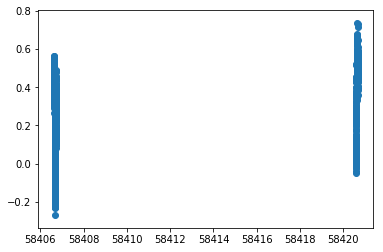

In [49]:
plt.scatter(lightcurve[:,0],lightcurve[:,1])

In [50]:
lightcurve

array([[5.84066303e+04, 5.62001197e-01],
       [5.84066303e+04, 4.86336788e-01],
       [5.84066304e+04, 5.48332092e-01],
       ...,
       [5.84206560e+04, 4.82334911e-01],
       [5.84206559e+04, 5.32550049e-01],
       [5.84206558e+04, 5.54912983e-01]])

Text(0.799,0.15,'Primary Minima\nDepth =0.733')

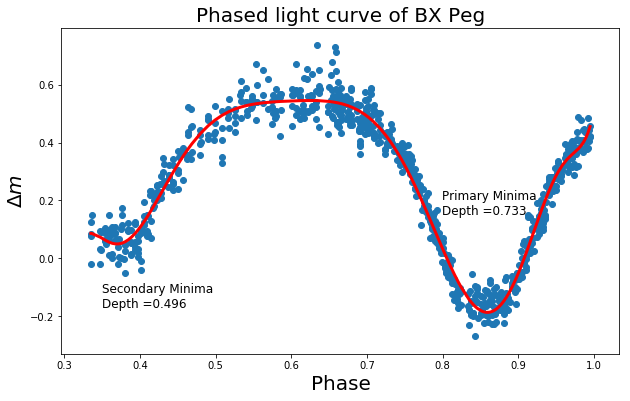

In [112]:
# phased light curve
plt.figure(figsize=(10, 6))
period = 0.280416
phased_lc = np.zeros(shape=lightcurve.shape)
phased_lc[:,0] = np.fmod(lightcurve[:,0]/period,1)
phased_lc[:,1] = lightcurve[:,1]
#phased_lc[:,2] = lightcurve[:,2]
#plt.scatter(phased_lc[:,0],phased_lc[:,1])

import numpy.polynomial.polynomial as poly
coefs = poly.polyfit(lightcurve_time, lightcurve_m,11)
fit = poly.polyval(lightcurve_time, coefs)
plt.scatter(lightcurve_time, lightcurve_m)
plt.plot(lightcurve_time, fit, color='red', lw=3)

plt.xlabel("Phase", fontsize=20)
plt.ylabel(r"$\Delta m$", fontsize=20)
plt.title("Phased light curve of BX Peg", fontsize=20)

sec_min = np.around(np.max(fit) - fit[30], decimals=3)
pri_min = np.around(np.max(fit) - fit[fit.argmin()], decimals=3)

plt.annotate("Secondary Minima\nDepth ="+str(sec_min), xy=(0.35, -0.17), fontsize=12)
plt.annotate("Primary Minima\nDepth ="+str(pri_min), xy=(0.799, 0.15), fontsize=12)
#plt.annotate("Maximum brightness ="+str(np.around(np.max(fit), decimals=3)), xy=(0.5, 0.26), fontsize=12)

In [92]:
fit_rat = ((0.55 + fit[fit.argmin()]) / (0.55 - fit[30]))**(1/4)

In [121]:
actual = 5500 / 5721

In [122]:
((fit_rat - actual) / actual) * 100

-4.050486625339586

In [115]:
r1_r2 = (fit_rat)**2 * (2.51**(sec_min - pri_min))**(0.5)

In [116]:
r1_r2

0.7629669055537147

In [120]:
1/r1_r2

1.3106728387835658

In [124]:
((0.55 + fit[fit.argmin()]))

0.3624435986665049

In [125]:
(0.55 - fit[30])**(1/4)

0.8411560835536194

In [126]:
fit_rat

0.9224302107334946